## Project 2 : Wrangle and Analyze Data

   ### Carried Out by Henry Ime Mbom
   ***
   
   ### Contents
   * Introduction
   * Data wrangling
     - Data Gathering
     - Data Assessing 
     - Data Cleaning
     - Data Storing
   * Data Analyses and visualization 
   ***
   
   ### Introduction
   
   * This project involves loading a pre-gathered data namely the WeRateDogs Twitter archive into my jupyter notebook and            downloading the tweet image predictions data programatically into the same notebook using the request module in Python.        Additonally, the WeRateDogs Twitter archive was querried programatically from Twitter's API  using an access library            called tweepy to get tweet's retweet count and favorite ("like") count data that were ommited from the previously gathered      WeRateDogs Twitter archive.
   
   
   * After gathering, the data were assessed visually and programmatically for quality and tidiness issues. At the end, at          least eight (8) quality issues and two (2) tidiness issues were detected and documented.
   
   
   * The result of the assessment stage was used to clean the individual datasets and merge them into a master pandas                DataFrame, stored to a comma seperated file for analysis and visualization 
   
   
   * The cleaned master dataset was then analyzed and visualized to produce at least three (3) insights and one (1)                  visualization.
   
   
   * Finally a 300-600 word written report with brief description of the wrangling efforts is produced, and another 250-word-        minimum written report to communicate the insights and displays the visualization(s) is produced from the wrangled data.     
 

### Data Wrangling
This process involves:
- Gather data from 3 different sources and load them into 3 dataframes
- Assess the 3 dataframes visually and programmatically for quality and tidiness issues and document the issues observed
- carry out data cleaning operation on the issues documented from the assessing stage

In [1]:
# Import necessary libraries for the poject
import pandas as pd
import numpy as np
import requests
#import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import seaborn as sn

### Data Gathering

* <b>Loading the WeRateDogs enhaced twitter dataset into the notebook </b>

In [2]:
enhanced_twitter_df = pd.read_csv('twitter_archive_enhanced.csv')

* <b> Programmatically getting the image-prediction.tsv file using the requests module and writing the content to a file named "image_predictions.tsv" </b>


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv' , mode ='wb') as file: 
    file.write(response.content)
image_predict_df = pd.read_csv('image_predictions.tsv', sep = '\t')

* <b> Querying Twitter's API  using the Python's tweepy access library for  retweet count and favorite count data.</b>

In [4]:
"""import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail") 
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\n\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

* <b> Loading the json file provided by Udacity and making a list of json tweets </b>

In [5]:
with open('tweet_json','r') as file:
    json_tweets = file.readlines()
list_of_dicts = []
for json_tweet in json_tweets:
        list_of_dicts.append(json.loads(json_tweet))
type(list_of_dicts)

list

* <b> Writing this list of json tweets into a txt file named 'tweet_json.txt'.</b>

In [6]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

### Loading the "tweet_json.txt" file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [7]:
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    each_dict = json.load(json_file)

In [8]:
my_json_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    tweet_dict = json.load(json_file)
    for dict_element in tweet_dict:
        tweet_id = dict_element['id']
        whole_tweet = dict_element['full_text']
        #only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = dict_element['favorite_count']
        retweet_count = dict_element['retweet_count']
        followers_count = dict_element['user']['followers_count']
        friends_count = dict_element['user']['friends_count']
        whole_source = dict_element['source']
        tweet_device = whole_source[whole_source.find('rel="nofollow">')+ 15:-4]
        source_device = tweet_device

        my_json_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'source_device': source_device
                            })
        tweet_df = pd.DataFrame(my_json_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source_device' ])

In [9]:
# Saving the tweet_df to a csv file for possible visual assessments
tweet_df.to_csv('tweet_df.csv')

### Assessment

* <b> Visual Assessments:</b> : The gathered Dataframe will be assessed individually by displaying them using a notebook; a text editor like sublime text can also be used to visually assess the 'twitter_archive_enhanced.csv' and the saved 'tweet_df.csv' datasets.

In [10]:
enhanced_twitter_df 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
image_predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
tweet_df 

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source_device
0,892420643555336193,39467,8853,3200889,104,Twitter for iPhone
1,892177421306343426,33819,6514,3200889,104,Twitter for iPhone
2,891815181378084864,25461,4328,3200889,104,Twitter for iPhone
3,891689557279858688,42908,8964,3200889,104,Twitter for iPhone
4,891327558926688256,41048,9774,3200889,104,Twitter for iPhone
...,...,...,...,...,...,...
2349,666049248165822465,111,41,3201018,104,Twitter for iPhone
2350,666044226329800704,311,147,3201018,104,Twitter for iPhone
2351,666033412701032449,128,47,3201018,104,Twitter for iPhone
2352,666029285002620928,132,48,3201018,104,Twitter for iPhone


* <b> Programmatic Assessments:</b> : Using functions or methods in Pandas to assess each dataframe

   #### (a) Programmatic Assessment of enhanced_twitter_df  DataFrame

In [13]:
# assesssing the datatypes of the enhanced_twitter_df dataFrame using the .info() method
enhanced_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# use a for loop to print the text of the tweets so as to inspect the presence of retweets, actual tweet ratings and explanation of tweet ratings 
for text in enhanced_twitter_df.text:
    print(text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

This is Spencer. He's part of the Queen's Guard. Takes his job very seriously. 11/10 https://t.co/8W5iSOgXfx
This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW
This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q
Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup https://t.co/rfWQ4T9iQj
This is Brandonald. He accidentally opened the front facing camera. Playing it off rather heckin well. 11/10 https://t.co/uPUAotqQtM
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
This is Odie. He falls asleep wherever he wants. Must be nice. 10/10 https://t.co/M9BXCSDVjh
This is Corey. He's a Portobello Corgicool. Trying to convince you that he's not a hipster. 11/10 yea right Corey https://t.co/NzWUrFZydr
In case you haven't seen the most dramatic sneez

Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh
Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo
Meet Jeb &amp; Bush. Jeb is somehow stuck in that fence and Bush won't stop whispering sweet nothings in his ear. 9/10s https://t.co/NRNExUy9Hm
This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb
Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD
When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp
This pupper is fed up with being tickled. 12/10 I'm currently working on an elaborate heist to steal this dog https://t.co/F33n1hy3LL
Rare submerged pup here. Holds breath for a long time. Frowning because that 

In [15]:
# assessing the number of unique values for the numerator's and denominator's rating values
print(enhanced_twitter_df.rating_numerator.value_counts())
print(enhanced_twitter_df.rating_denominator.value_counts())  

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64
10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64


In [16]:
 # Getting the row numbers of the rating_numerator and rating_denominator values that are zero
enhanced_twitter_df.query('rating_denominator == 0 or rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [17]:
# Get the text of those row numbers whose rating_numerator and rating_denominator values that are zero  
enhanced_twitter_df.iloc[[313,315,1016]].text.values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
       "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
       "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"],
      dtype=object)

In [18]:
# Check the text column to see if the embedded numerator and denominator values are all whole integers.
enhanced_twitter_df[enhanced_twitter_df.text.str.contains(r'(\d+(\.\d+))\/(\d+)')].text.values

C:\Users\Doctor Mfonmma\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
       "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'],
      dtype=object)

In [19]:
# assessing the dog name column of the dataDrame for possible error in spelling or an invalid name
enhanced_twitter_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [20]:
# some of names are upper case while others are lower case
# count the names of dogs that are not in uppercase via the first character of their name

name_lower=enhanced_twitter_df[enhanced_twitter_df.name.str[0].str.islower()].name.value_counts()
name_lower

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
getting          2
not              2
actually         2
infuriating      1
old              1
by               1
his              1
unacceptable     1
such             1
officially       1
space            1
light            1
all              1
incredibly       1
my               1
this             1
life             1
Name: name, dtype: int64

In [21]:
# assessing the number of duplicate values for the tweet_ids in the enhanced_twitter_df dataFrame
enhanced_twitter_df[enhanced_twitter_df.tweet_id.duplicated()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

In [22]:
enhanced_twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### (b) Programmatic Assessment of the image_predict_df  DataFrame

In [23]:
# Inspecting the number of entries and datatypes of each column in the image_predict_df dataFrame
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# assessing whether the first prediction has breeds of dog or not  
image_predict_df.p1_dog.values

array([ True,  True,  True, ...,  True,  True, False])

In [25]:
# assessing whether the second prediction has breeds of dog or not  
image_predict_df.p2_dog.values

array([ True,  True,  True, ...,  True,  True, False])

In [26]:
# assessing whether the third prediction has breeds of dog or not  
image_predict_df.p3_dog.values

array([ True,  True,  True, ...,  True,  True, False])

In [27]:
# assess the breed names for the first image prediction that are dog breeds 
image_predict_df[image_predict_df['p1_dog']==True ].p1.unique() 

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

In [28]:
# assess the breed names for the second image prediction that are dog breeds 
image_predict_df[image_predict_df['p2_dog']==True ].p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'Tibetan_mastiff', 'komondor',
       'Yorkshire_terrier', 'English_foxhound', 'bull_mastiff',
       'German_shepherd', 'Shih-Tzu', 'Newfoundland', 'toy_terrier',
       'toy_poodle', 'Chesapeake_Bay_retriever', 'Siberian_husky',
       'Afghan_hound', 'bloodhound', 'papillon', 'cocker_spaniel', 'chow',
       'Irish_terrier', 'beagle', 'giant_schnauzer', 'Labrador_retriever',
       'Pembroke', 'Chihuahua', 'Weimaraner', 'Brittany_spaniel',
       'standard_schnauzer', 'vizsla', 'pug', 'Italian_greyhound',
       'Samoyed', 'Pomeranian', 'miniature_poodle', 'Lakeland_terrier',
       'Irish_setter', 'malamute', 'Border_collie', 'Leonberg',
       'French_bulldog', 'golden_retriever', 'standard_poodle', 'kuvasz',
       'Cardigan', 'silky_terrier', 'English_setter', 'Pekinese', 'boxer',
       'basset', 'Bedlington_terrier', 'Shetland_sheepdog', 'Lhasa',
       'groenendael', 'Austra

In [29]:
# assess the breed names for the third image prediction that are dog breeds 
image_predict_df[image_predict_df['p3_dog']==True ].p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'golden_retriever', 'soft-coated_wheaten_terrier',
       'Labrador_retriever', 'Pekinese', 'Ibizan_hound', 'French_bulldog',
       'malinois', 'Dandie_Dinmont', 'borzoi', 'basenji',
       'miniature_poodle', 'groenendael', 'Eskimo_dog', 'briard',
       'papillon', 'flat-coated_retriever', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'Saluki', 'Great_Pyrenees',
       'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'giant_schnauzer', 'kelpie', 'Brabancon_griffon',
       'standard_poodle', 'beagle', 'Irish_water_spaniel', 'bluetick',
       'Weimaraner', 'Chesapeake_Bay_retriever',
       'black-and-tan_coonhound', 'kuvasz', 'Staffordshire_bullterrier',
       'Yorkshire_terrier', 'Lakeland_terrier', 'cocker_spaniel',
       'Australian_terrier', 'Great_Dane', 'curly-coated_retriever',
       'schipperke', 'Newfoundla

#### (c) Programmatic Assessment of the additional tweet_df  DataFrame

In [30]:
# Inspecting the number of entries and datatypes of each column in the tweet_df dataFrame
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   favorite_count   2354 non-null   int64 
 2   retweet_count    2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
 4   friends_count    2354 non-null   int64 
 5   source_device    2354 non-null   object
dtypes: int64(4), object(2)
memory usage: 110.5+ KB


In [31]:
tweet_df.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2354.000000,2354.000000,2.354000e+03,2354.0
mean,8080.968564,3164.797366,3.200942e+06,104.0
std,11814.771334,5284.770364,4.457302e+01,0.0
min,0.000000,0.000000,3.200799e+06,104.0
25%,1415.000000,624.500000,3.200898e+06,104.0
50%,3603.500000,1473.500000,3.200945e+06,104.0
75%,10122.250000,3652.000000,3.200953e+06,104.0
max,132810.000000,79515.000000,3.201018e+06,104.0


### Quality Issues for enhanced_twitter_df dataFrame
* tweet_id's datatype is in interger instead of string
* The name of some dog stages are wrongly spelt like "a","an", "the", "this", "actuality", etc
* The numerator rating of row number 315 (tweet_id: 835152434251116546) and 1016 (tweet_id : 746906459439529985) are set to       zero, while the denominator rating of row 313(tweet_id: 835246439529840640) is set to 960/00 instead of 13/10
* Six numerator ratings value are in decimals
* some text in the enhanced_twitter_df dataFrame are retweets or explaination of a tweet's rating instead of actual tweets.
* timestamp is given as a string instead of DateTime format
* Some columns in the enhanced_twitter_df such as n_reply_to_status_id and in_reply_to_user_id have values that are duplicated in the     tweet_df dataFrame 

### Quality Issues for image_predict_df dataFrame
* tweet_id's datatype is in interger instead of string
* The dog names in columns p1, p2 and p3 are use a mixtures of hypen, underscore and space. 

### Tidiness issues for enhanced_twitter_df dataFrame
* The various dog stages: doggo, floofer, pupper, puppo all have a value of None values can be grouped under one column 
* The three datasets:enhanced_twitter_df, image_predict_df and tweet_df API data have some duplicate columns and can be combined into a single dataset for efficient accessing

### Tidiness issues for image_predict_df dataFrame
* The values of dog breed predictions in p1_dog, p2_dog and p3_dog column contain True and False dog breed predictions

## Cleaning

#### Make a copy of each Dataset

In [32]:
enhanced_twitter_df = enhanced_twitter_df.copy()
tweet_df = tweet_df.copy()
image_predict_df = image_predict_df.copy()

### Quality Issue 1(For enhanced_twitter dataset)

#### Define
* <b> Convert enhanced_twitter_df dataset from interger to string </b>

#### Code

In [33]:
#convert the tweet_id column of enhanced_twitter_df dataset to string 
enhanced_twitter_df.tweet_id = enhanced_twitter_df.tweet_id.astype(str)

In [34]:
# Check to see if the data type of tweet_id  is now string  
enhanced_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality Issue 2 ( (For enhanced_twitter dataset)

#### Define
* <b> Convert the timestamp column of enhanced_twitter_df to DateTime </b>

#### Code

In [35]:
# convert the timestamp datatype of enhanced_twitter_df to DateTime
enhanced_twitter_df.timestamp = pd.to_datetime(enhanced_twitter_df.timestamp)

#### Test

In [36]:
enhanced_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality Issue 3 (For enhanced_twitter dataset)

#### Define
* <b> Set invalid dog names such as: 'a', 'the', 'an', etc. to 'None' value </b>

#### Code

In [37]:
# Use the str function to filter out names with lowercase from enhanced_twitter_df dataset and convert it to a list
dict_noname={}
enhanced_twitter_df_list = enhanced_twitter_df.name.str[0].str.islower()
for invalid_name in enhanced_twitter_df[enhanced_twitter_df_list].name.unique().tolist():
    dict_noname[invalid_name] = 'None'
dict_noname

{'such': 'None',
 'a': 'None',
 'quite': 'None',
 'not': 'None',
 'one': 'None',
 'incredibly': 'None',
 'mad': 'None',
 'an': 'None',
 'very': 'None',
 'just': 'None',
 'my': 'None',
 'his': 'None',
 'actually': 'None',
 'getting': 'None',
 'this': 'None',
 'unacceptable': 'None',
 'all': 'None',
 'old': 'None',
 'infuriating': 'None',
 'the': 'None',
 'by': 'None',
 'officially': 'None',
 'life': 'None',
 'light': 'None',
 'space': 'None'}

In [38]:
enhanced_twitter_df['name'].replace(dict_noname, inplace=True)

#### Test

In [39]:
# Check if invalid names have been replaced with None
enhanced_twitter_df['name'].value_counts()

None       854
Charlie     12
Lucy        11
Cooper      11
Oliver      11
          ... 
Hall         1
Bones        1
Darrel       1
Mojo         1
Ivar         1
Name: name, Length: 932, dtype: int64

### Quality Issue 4 (For enhanced_twitter dataset)

#### Define
* <b> Convert the rating_numerator and rating_denominator to float to accommodate the six fractional numerators values.</b>

#### Code

In [40]:
#changing the rating_numerator and rating_denominator to float 
enhanced_twitter_df['rating_numerator']=enhanced_twitter_df['rating_numerator'].astype(float)
enhanced_twitter_df['rating_denominator']=enhanced_twitter_df['rating_denominator'].astype(float)

#### Test

In [41]:
enhanced_twitter_df['rating_numerator'], enhanced_twitter_df['rating_denominator']

(0       13.0
 1       13.0
 2       12.0
 3       13.0
 4       12.0
         ... 
 2351     5.0
 2352     6.0
 2353     9.0
 2354     7.0
 2355     8.0
 Name: rating_numerator, Length: 2356, dtype: float64,
 0       10.0
 1       10.0
 2       10.0
 3       10.0
 4       10.0
         ... 
 2351    10.0
 2352    10.0
 2353    10.0
 2354    10.0
 2355    10.0
 Name: rating_denominator, Length: 2356, dtype: float64)

### Quality Issue 5 (For enhanced_twitter dataset)

#### Define
* <b> Set row 313 (tweet_id: 835246439529840640) is set to 13/10 from 960/00.</b>

#### Code

In [42]:
# using mask to assign 13 to enhanced_twitter_df numerator rating which was initially 960.0  
enhanced_twitter_df.query('rating_denominator == 0')                # affirming the row number : this should give 313
mask_1 = enhanced_twitter_df['rating_numerator'] == 960.0
mask_2 = enhanced_twitter_df['rating_denominator'] == 0.0
enhanced_twitter_df.loc[mask_1, 'rating_numerator'] = 13.0
enhanced_twitter_df.loc[mask_2, 'rating_denominator'] = 10.0

#### Test

In [43]:
#confirming that numerator and denominator values have been corrected
enhanced_twitter_df.iloc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                      835245984028504064.0
in_reply_to_user_id                                                  26259576.0
timestamp                                             2017-02-24 21:54:03+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                           13.0
rating_denominator                                                         10.0
name                                    

### Quality Issue 6 (For enhanced_twitter dataset)

#### Define
* <b> Remove irrelevant retweet, reply tweets, and expanded_urls columns </b>

#### Code

In [44]:
cols=['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 
      'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
      'expanded_urls']
enhanced_twitter_df.drop(columns=cols, inplace=True)

#### Test

In [45]:
enhanced_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   float64            
 4   rating_denominator  2356 non-null   float64            
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 184.2+ KB


In [46]:
tweet_df

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source_device
0,892420643555336193,39467,8853,3200889,104,Twitter for iPhone
1,892177421306343426,33819,6514,3200889,104,Twitter for iPhone
2,891815181378084864,25461,4328,3200889,104,Twitter for iPhone
3,891689557279858688,42908,8964,3200889,104,Twitter for iPhone
4,891327558926688256,41048,9774,3200889,104,Twitter for iPhone
...,...,...,...,...,...,...
2349,666049248165822465,111,41,3201018,104,Twitter for iPhone
2350,666044226329800704,311,147,3201018,104,Twitter for iPhone
2351,666033412701032449,128,47,3201018,104,Twitter for iPhone
2352,666029285002620928,132,48,3201018,104,Twitter for iPhone


### Quality Issue 7 (For image prediction dataset)

#### Define
* <b> Convert tweet_id of image_predict_df datatype to string </b>

#### Code

In [47]:
image_predict_df.tweet_id = image_predict_df.tweet_id.astype(str)

#### Test

In [48]:
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality Issue 8 (For image prediction dataset)

#### Define
* <b> make dog names in columns p1, p2 and p3 of image_predict_df dataset standardized </b>

#### Code 

In [49]:
# Use 'str' method to replace underscores with space and convert the result to title case
image_predict_df.p1 = image_predict_df.p1.str.replace('_', ' ').str.title()
image_predict_df.p2 = image_predict_df.p2.str.replace('_', ' ').str.title()
image_predict_df.p3 = image_predict_df.p3.str.replace('_', ' ').str.title()

#### Test

In [50]:
image_predict_df[['p1', 'p2' , 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


### Tidiness Issue 1 (For enhanced_twitter dataset)

#### Define
* <b> Combine floofer, doggo,  pupper, puppo columns into a single dog_stage column </b>

In [51]:
# set None to NaN before counting dog stages in each row
enhanced_twitter_df.doggo = enhanced_twitter_df.doggo.apply(lambda entry: pd.np.nan if entry == 'None' else entry)
enhanced_twitter_df.floofer = enhanced_twitter_df.floofer.apply(lambda entry: pd.np.nan if entry == 'None' else entry)
enhanced_twitter_df.pupper = enhanced_twitter_df.pupper.apply(lambda entry: pd.np.nan if entry == 'None' else entry)
enhanced_twitter_df.puppo = enhanced_twitter_df.puppo.apply(lambda entry: pd.np.nan if entry == 'None' else entry)

<ipython-input-51-2a39a2739afe>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  enhanced_twitter_df.doggo = enhanced_twitter_df.doggo.apply(lambda entry: pd.np.nan if entry == 'None' else entry)
<ipython-input-51-2a39a2739afe>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  enhanced_twitter_df.floofer = enhanced_twitter_df.floofer.apply(lambda entry: pd.np.nan if entry == 'None' else entry)
<ipython-input-51-2a39a2739afe>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  enhanced_twitter_df.pupper = enhanced_twitter_df.pupper.apply(lambda entry: pd.np.nan if entry == 'None' else entry)
<ipython-input-51-2a39a2739afe>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. I

In [52]:
# Function for counting dog stage in each row
def dog_stage_cnt(row):
    count_dogstage = row[['doggo', 'floofer', 'pupper', 'puppo']].count().sum()
    
    if (count_dogstage > 1):
        return 'multiple'
    else:
        if (row.doggo == row.doggo):
            return 'doggo'
        elif (row.floofer == row.floofer):
            return 'floofer'
        elif (row.pupper == row.pupper):
            return 'pupper'
        elif (row.puppo == row.puppo):
            return 'puppo'
    return pd.np.nan

enhanced_twitter_df['dog_stage'] = enhanced_twitter_df.apply(lambda row: dog_stage_cnt(row), axis = 1)

<ipython-input-52-6512c80498cc>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [53]:
enhanced_twitter_df['dog_stage'].value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: dog_stage, dtype: int64

In [54]:
enhanced_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   float64            
 4   rating_denominator  2356 non-null   float64            
 5   name                2356 non-null   object             
 6   doggo               97 non-null     object             
 7   floofer             10 non-null     object             
 8   pupper              257 non-null    object             
 9   puppo               30 non-null     object             
 10  dog_stage           380 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 202.6+ KB


In [55]:
# remove the 'doggo', 'floofer', 'pupper', 'puppo' columns
enhanced_twitter_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [56]:
enhanced_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   float64            
 4   rating_denominator  2356 non-null   float64            
 5   name                2356 non-null   object             
 6   dog_stage           380 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 129.0+ KB


In [57]:
enhanced_twitter_df.dog_stage.value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: dog_stage, dtype: int64

### Tidiness Issue 2 (For image prediction dataset)

#### Define
* <b> Combine floofer, doggo,  pupper, puppo columns into a single dog_stage column </b>

#### Code 

In [58]:
# Add a new column to identify dog breeds predictions that are true, not true and hybrid. 
image_predict_df.loc[(image_predict_df.p1_dog.values.astype(int)+image_predict_df.p2_dog.astype(int)+image_predict_df.p3_dog.astype(int) == 0),'p_class'] = 'not dog'
image_predict_df.loc[(image_predict_df.p1_dog.values.astype(int)+image_predict_df.p2_dog.values.astype(int)+image_predict_df.p3_dog.values.astype(int) == 1),'p_class'] = 'hybrid'
image_predict_df.loc[(image_predict_df.p1_dog.values.astype(int)+image_predict_df.p2_dog.values.astype(int)+image_predict_df.p3_dog.values.astype(int) == 2),'p_class'] = 'hybrid'
image_predict_df.loc[(image_predict_df.p1_dog.values.astype(int)+image_predict_df.p2_dog.values.astype(int)+image_predict_df.p3_dog.values.astype(int) == 3),'p_class'] = 'dog'

#### Test

In [59]:
# Verify if the column values are correct
image_predict_df.p_class.value_counts()

dog        1243
hybrid      508
not dog     324
Name: p_class, dtype: int64

### Tidiness Issue 3 (For both image prediction dataset and enhanced_twitter datasets)

#### Define
* <b> combine all the 3 dataframes into a single dataframe and drop any irrelevant column in the combined dataset </b>

#### Codes

In [60]:
#combine the 3 datasets on "tweet_id" 
combined_twitter_df=enhanced_twitter_df.merge(tweet_df, how='inner', on='tweet_id')

In [61]:
master_twitter_df = combined_twitter_df.merge(image_predict_df,how='inner', on='tweet_id')

In [62]:
master_twitter_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorite_count',
       'retweet_count', 'followers_count', 'friends_count', 'source_device',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'p_class'],
      dtype='object')

In [63]:
# remove the irrelevant columns from the combined dataset
master_twitter_df.drop(columns=['followers_count', 'friends_count', 'jpg_url', 'img_num'], inplace=True)

#### Test

In [64]:
master_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   text                2073 non-null   object             
 3   rating_numerator    2073 non-null   float64            
 4   rating_denominator  2073 non-null   float64            
 5   name                2073 non-null   object             
 6   dog_stage           320 non-null    object             
 7   favorite_count      2073 non-null   int64              
 8   retweet_count       2073 non-null   int64              
 9   source_device       2073 non-null   object             
 10  p1                  2073 non-null   object             
 11  p1_conf             2073 non-null   float64            
 12  p1_dog              2073 non-null 

## Storing Data

In [65]:
master_twitter_df.to_csv('twitter_archive_master.csv', index=False)

## Data visualization and Analysis

### Using the wrangled master dataset to produce at least three (3) insights and one (1) visualization.

In [66]:
# Importing the necessary datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
%matplotlib inline

In [67]:
# Read in the dataset
twitter_master_df = pd.read_csv('twitter_archive_master.csv')
twitter_master_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,source_device,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_class
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,39467,8853,Twitter for iPhone,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,not dog
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,33819,6514,Twitter for iPhone,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,dog
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,25461,4328,Twitter for iPhone,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,dog
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,42908,8964,Twitter for iPhone,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,hybrid
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,41048,9774,Twitter for iPhone,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,dog


### Data Insight 1

#### <b> First, take a look at the descriptive statistics our new wrangled master dataframe.</b>

In [68]:
twitter_master_df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,7.383634e+17,12.265798,10.511819,8556.718283,2976.089243,0.594532,1.346665e-01,6.034005e-02
std,6.780118e+16,40.699924,7.180517,12098.640994,5054.897526,0.271234,1.006830e-01,5.092769e-02
min,6.660209e+17,0.000000,2.000000,0.000000,16.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764706e+17,10.000000,10.000000,1674.000000,634.000000,0.364095,5.390140e-02,1.619920e-02
50%,7.119681e+17,11.000000,10.000000,3864.000000,1408.000000,0.588230,1.186220e-01,4.947150e-02
75%,7.931959e+17,12.000000,10.000000,10937.000000,3443.000000,0.843911,1.955730e-01,9.193000e-02
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,1.000000,4.880140e-01,2.734190e-01


### Visualization 1

#### <b> Let us visualize the numerator rating for the top 15 dogs </b>

In [69]:
twitter_master_df.rating_numerator.value_counts()

12.0      473
10.0      429
11.0      413
13.0      283
9.0       151
8.0        95
7.0        52
14.0       40
5.0        34
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
0.0         2
165.0       1
420.0       1
60.0        1
75.0        1
26.0        1
84.0        1
80.0        1
88.0        1
99.0        1
1776.0      1
15.0        1
144.0       1
27.0        1
121.0       1
50.0        1
204.0       1
45.0        1
24.0        1
44.0        1
143.0       1
Name: rating_numerator, dtype: int64

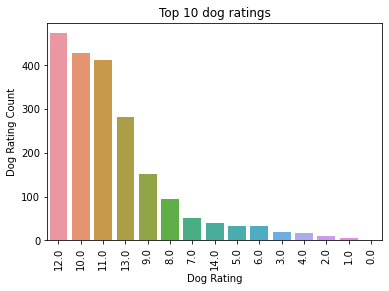

In [70]:
dog_ratings=twitter_master_df.rating_numerator.value_counts().index[0:15]
dog_counts=twitter_master_df.rating_numerator.value_counts().values[0:15]

sn.barplot(x=dog_ratings, y=dog_counts, order = dog_ratings)
plt.xlabel('Dog Rating')
plt.ylabel('Dog Rating Count')
plt.title('Top 10 dog ratings')
plt.xticks(rotation = 90);

#### Next let us visualize the top 15 dog breeds of the first image predicted by the algorithm

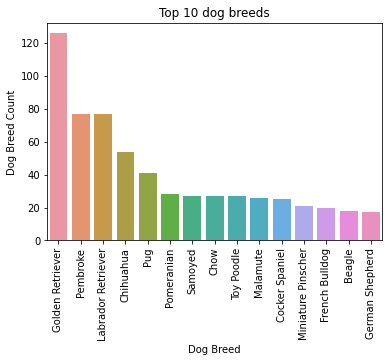

In [71]:
dog_breeds=twitter_master_df[twitter_master_df.p_class=='dog'].p1.value_counts().index[0:15]
breed_counts=twitter_master_df[twitter_master_df.p_class=='dog'].p1.value_counts().values[0:15]

sn.barplot(x=dog_breeds, y=breed_counts, order = dog_breeds)
plt.xlabel('Dog Breed')
plt.ylabel('Dog Breed Count')
plt.title('Top 10 dog breeds')
plt.xticks(rotation = 90);

### Data Insights 2

#### Let us investigate the dog class with the maximum number of retweet counts as revealed by our descriptive statistics above(79515.0)

In [72]:
#highest retweet counts
twitter_master_df[twitter_master_df.retweet_count == 79515.0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,source_device,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_class
851,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,131075,79515,Twitter for iPhone,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,hybrid


#### Let us investigate the dog class with the maximum number of favorite counts as revealed by our descriptive statistics above(132810.0)

In [73]:
#highest retweet counts
twitter_master_df[twitter_master_df.favorite_count == 132810.0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,source_device,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_class
329,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,132810,48265,Twitter for iPhone,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True,dog


 #### Let us investigate the dog with the highest confidence level P1 prediction(1.0)

In [74]:
# highest p1_conf 
twitter_master_df[twitter_master_df.p1_conf == 1.0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,source_device,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_class
1966,667866724293877760,2015-11-21 00:46:50+00:00,This is Shaggy. He knows exactly how to solve ...,10.0,10.0,Shaggy,NaN,3172,1110,Twitter for iPhone,Jigsaw Puzzle,1.0,False,Prayer Rug,1.011300e-08,False,Doormat,1.740170e-10,False,not dog


### The dog class emerged as the maximum number of favourite counts while the hybrid class emerged with the most retweeted count, and both of them have the same numerator rating of 13.0 with ranking of  4th in the top 10 dog ratings.. The non-dog class however emerged with the highest confidence level P1 prediction and a numerator rating of 10.0 which ranked 2nd in the top 10 dog ratings. Both the dog and hybrid were Labrador Retriever and  they ranked 3rd in the top 10 dog breeds; but the not dog was misclassified a Spanish Water Dog which is a dog breed not found among the top 15 dog breeds.

### Visualization 2 and Data Insight 3

####  Investigate of the correlation between the favorite and retweet counts

C:\Users\Doctor Mfonmma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


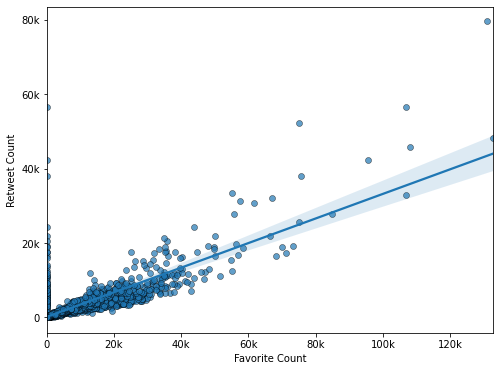

In [75]:
fig, ax = plt.subplots(figsize=(8,6))
sb.regplot(twitter_master_df.favorite_count, twitter_master_df.retweet_count,
           ax=ax,
           scatter_kws={'alpha': 0.7, 'edgecolor': 'k', 'linewidth': 0.5})
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.xticks([0,20000,40000,60000,80000,100000,120000],
           ['0','20k','40k','60k','80k','100k','120k'])
plt.yticks([0,20000,40000,60000,80000],
           ['0','20k','40k','60k','80k']);

#### From the figure, It is obviousthat there is a positive correlation between favorite counts and retweet counts. The counts is highly  concentrated between 0 to 40k favorite counts, with more counts lying below the regression line.

### Investigating how the retweet count and favourite count change with time within the period WeRateDogs Twitter archive data was collected.

In [76]:
twitter_master_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorite_count',
       'retweet_count', 'source_device', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'p_class'],
      dtype='object')

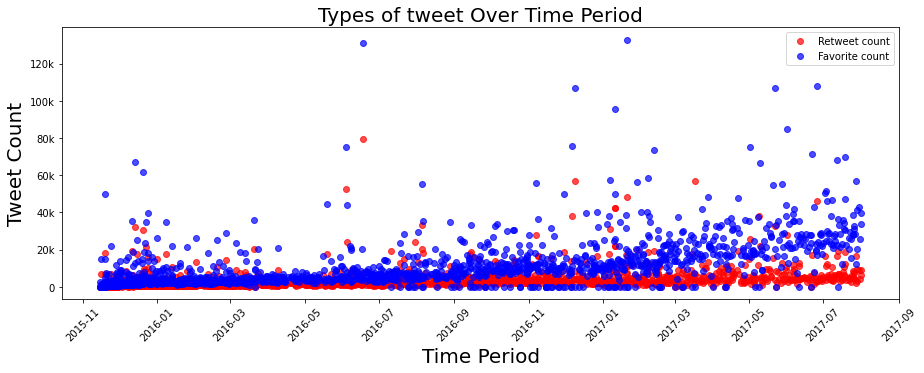

In [77]:
time_period=pd.to_datetime(twitter_master_df.timestamp).dt.date

fig, ax = plt.subplots(figsize=(15,5))
plt.plot_date(time_period,twitter_master_df.retweet_count, color='red', 
              marker='o', linewidth=0.5,
              alpha=0.7, label='Retweet count')
plt.plot_date(time_period,twitter_master_df.favorite_count, color='blue', linewidth=0.5,
              marker='o',
              alpha=0.7, label='Favorite count')
plt.legend()
plt.xlabel('Time Period', fontsize=20)
plt.ylabel('Tweet Count', fontsize=20)
plt.title('Types of tweet Over Time Period', fontsize=20)
plt.yticks([0,20000,40000,60000,80000,100000,120000],
           ['0','20k','40k','60k','80k','100k','120k'])
plt.xticks(rotation = 45);

#### From the figure, it is observed that the intensities of both favorite and retweet counts were similar between 2015-11 to 2016-05,  though the number of favorite counts were higher than retweet counts. The favourite count showed a steady increasing trend above the retweet counts from around 2016-09 to  slightly above 2017-07. The majority of the retweet counts however remained between 0 and 20k. 